## Covid Analysis Project

In [36]:
## 1. Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# For inline plots
%matplotlib inline

In [37]:
## 2. Load Dataset
df = pd.read_csv('transformed_data.csv')
df['DATE'] = pd.to_datetime(df['DATE'])

In [38]:
print(df.head())

  CODE      COUNTRY       DATE    HDI   TC   TD  STI        POP    GDPCAP
0  AFG  Afghanistan 2019-12-31  0.498  0.0  0.0  0.0  17.477233  7.497754
1  AFG  Afghanistan 2020-01-01  0.498  0.0  0.0  0.0  17.477233  7.497754
2  AFG  Afghanistan 2020-01-02  0.498  0.0  0.0  0.0  17.477233  7.497754
3  AFG  Afghanistan 2020-01-03  0.498  0.0  0.0  0.0  17.477233  7.497754
4  AFG  Afghanistan 2020-01-04  0.498  0.0  0.0  0.0  17.477233  7.497754


In [53]:
print(df)

      CODE      COUNTRY       DATE    HDI        TC        TD       STI  \
0      AFG  Afghanistan 2019-12-31  0.498  0.000000  0.000000  0.000000   
1      AFG  Afghanistan 2020-01-01  0.498  0.000000  0.000000  0.000000   
2      AFG  Afghanistan 2020-01-02  0.498  0.000000  0.000000  0.000000   
3      AFG  Afghanistan 2020-01-03  0.498  0.000000  0.000000  0.000000   
4      AFG  Afghanistan 2020-01-04  0.498  0.000000  0.000000  0.000000   
...    ...          ...        ...    ...       ...       ...       ...   
50413  ZWE     Zimbabwe 2020-10-15  0.535  8.994048  5.442418  4.341855   
50414  ZWE     Zimbabwe 2020-10-16  0.535  8.996528  5.442418  4.341855   
50415  ZWE     Zimbabwe 2020-10-17  0.535  8.999496  5.442418  4.341855   
50416  ZWE     Zimbabwe 2020-10-18  0.535  9.000853  5.442418  4.341855   
50417  ZWE     Zimbabwe 2020-10-19  0.535  9.005405  5.442418  4.341855   

             POP    GDPCAP  new_cases  
0      17.477233  7.497754   0.000000  
1      17.477233  7

In [39]:
## 3. Overview of Data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50418 entries, 0 to 50417
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   CODE     50418 non-null  object        
 1   COUNTRY  50418 non-null  object        
 2   DATE     50418 non-null  datetime64[ns]
 3   HDI      44216 non-null  float64       
 4   TC       50418 non-null  float64       
 5   TD       50418 non-null  float64       
 6   STI      50418 non-null  float64       
 7   POP      50418 non-null  float64       
 8   GDPCAP   50418 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 3.5+ MB
None


In [40]:
print(df.describe())

                                DATE           HDI            TC  \
count                          50418  44216.000000  50418.000000   
mean   2020-06-17 15:44:08.911103232      0.720139      6.762125   
min              2019-12-31 00:00:00      0.000000      0.000000   
25%              2020-04-21 00:00:00      0.601000      4.158883   
50%              2020-06-21 00:00:00      0.752000      7.092574   
75%              2020-08-20 00:00:00      0.847000      9.504669   
max              2020-10-19 00:00:00      0.953000     15.914092   
std                              NaN      0.160902      3.637347   

                 TD           STI           POP        GDPCAP  
count  50418.000000  50418.000000  50418.000000  50418.000000  
mean       3.413681      3.178897     15.442097      8.318580  
min        0.000000      0.000000      6.695799      0.000000  
25%        0.000000      2.867331     14.151619      7.955479  
50%        3.178054      4.000583     15.929201      9.368531  
75%

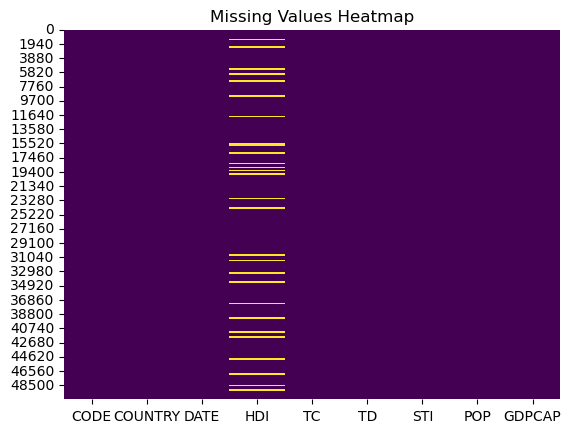

In [41]:
## 4. Check Missing Values
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [42]:
## 5. Country-wise Total Cases and Deaths
latest = df.sort_values('DATE').drop_duplicates('COUNTRY', keep='last')
fig = px.bar(latest.sort_values('TC', ascending=False).head(20), x='COUNTRY', y='TC', title='Top 20 Countries by Total Cases')
fig.show()

fig = px.bar(latest.sort_values('TD', ascending=False).head(20), x='COUNTRY', y='TD', title='Top 20 Countries by Total Deaths')
fig.show()

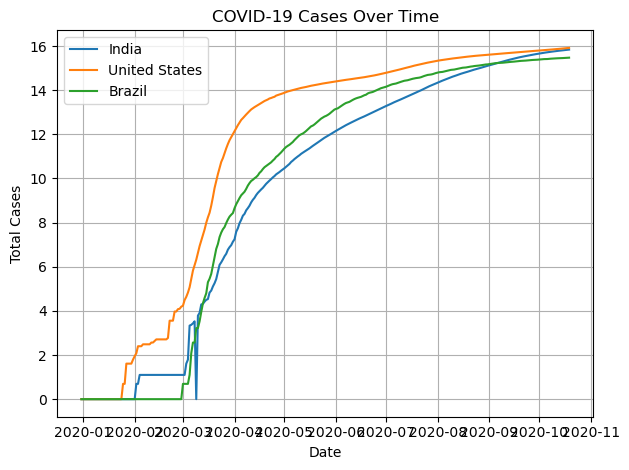

In [43]:
## 6. Time Series Analysis for Selected Countries
countries = ['India', 'United States', 'Brazil']
for country in countries:
    country_df = df[df['COUNTRY'] == country]
    plt.plot(country_df['DATE'], country_df['TC'], label=country)
plt.title('COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

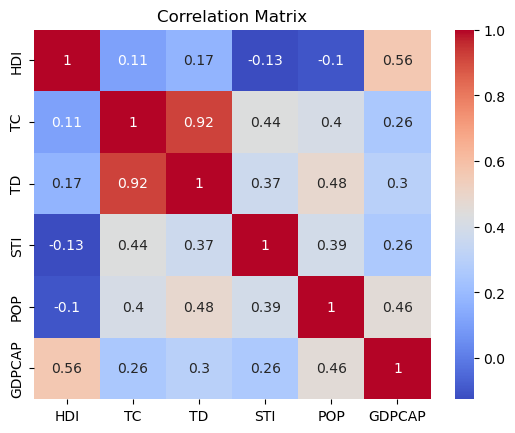

In [44]:
## 7. Correlation Heatmap
corr = df[['HDI', 'TC', 'TD', 'STI', 'POP', 'GDPCAP']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


### Q1: Which countries had the highest stringency index?

Top 10 Countries by Max Stringency Index:
COUNTRY
Kuwait         4.60517
Libya          4.60517
Honduras       4.60517
Philippines    4.60517
India          4.60517
Oman           4.60517
Cuba           4.60517
Argentina      4.60517
Georgia        4.60517
Serbia         4.60517
Name: STI, dtype: float64


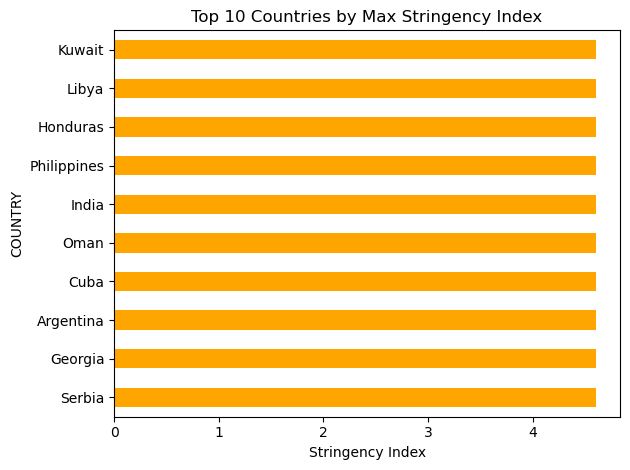

In [45]:
top_stringency = df.groupby('COUNTRY')['STI'].max().sort_values(ascending=False).head(10)
print("Top 10 Countries by Max Stringency Index:")
print(top_stringency)

top_stringency.plot(kind='barh', title='Top 10 Countries by Max Stringency Index', color='orange')
plt.xlabel('Stringency Index')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### Q2: Is there a relationship between GDP per capita and total COVID-19 cases?

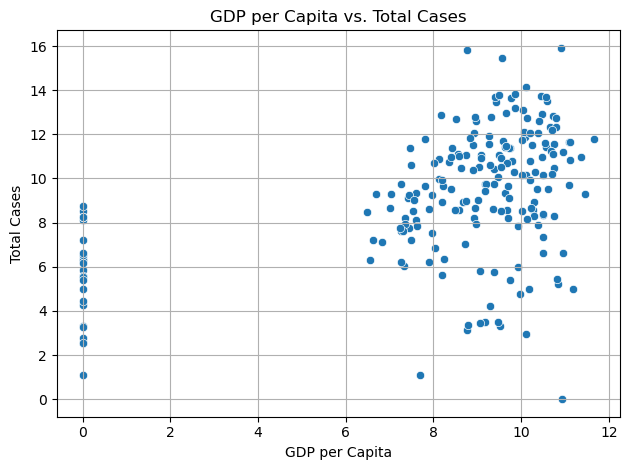

In [46]:
latest = df.sort_values('DATE').drop_duplicates('COUNTRY', keep='last')
sns.scatterplot(data=latest, x='GDPCAP', y='TC')
plt.title('GDP per Capita vs. Total Cases')
plt.xlabel('GDP per Capita')
plt.ylabel('Total Cases')
plt.grid(True)
plt.tight_layout()
plt.show()

### Q3: Which countries had the highest death-to-case ratio?

In [47]:
latest['DeathRate'] = latest['TD'] / latest['TC']
highest_death_rate = latest.sort_values('DeathRate', ascending=False).head(10)
print("Top 10 Countries by Death-to-Case Ratio:")
print(highest_death_rate[['COUNTRY', 'DeathRate']])

Top 10 Countries by Death-to-Case Ratio:
              COUNTRY  DeathRate
49989           Yemen   0.837738
30408          Mexico   0.832260
23698           Italy   0.812284
48120  United Kingdom   0.791964
13972         Ecuador   0.789308
22309            Iran   0.783029
48414   United States   0.772894
6864           Brazil   0.772034
5944          Bolivia   0.763485
36502            Peru   0.762502


### Q4: How did HDI correlate with COVID-19 outcomes?

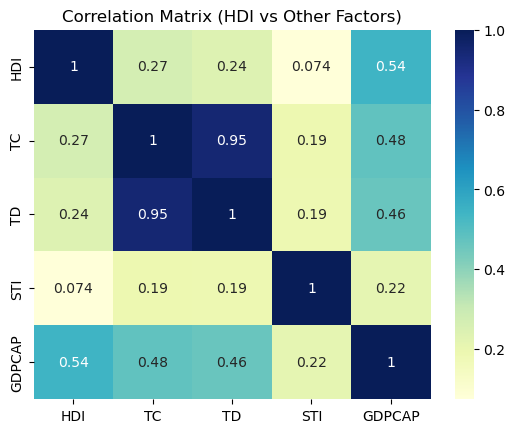

In [48]:
corr_matrix = latest[['HDI', 'TC', 'TD', 'STI', 'GDPCAP']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')
plt.title('Correlation Matrix (HDI vs Other Factors)')
plt.show()

### Q5: What was the trend in stringency index for selected countries?

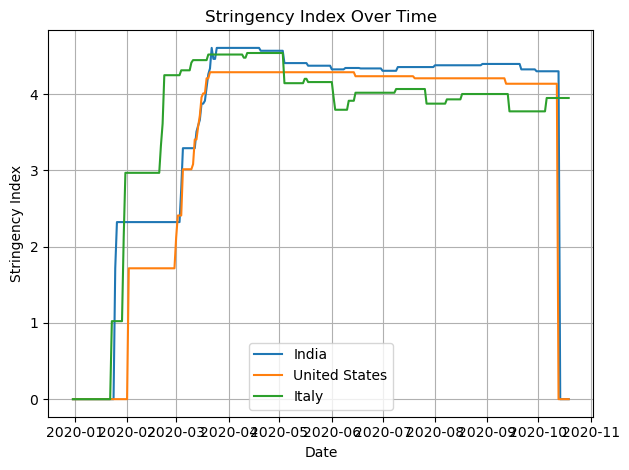

In [49]:
countries = ['India', 'United States', 'Italy']
for country in countries:
    subset = df[df['COUNTRY'] == country]
    plt.plot(subset['DATE'], subset['STI'], label=country)
plt.title('Stringency Index Over Time')
plt.xlabel('Date')
plt.ylabel('Stringency Index')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Q6: Which countries had the fastest increase in total cases?

Top 10 Countries with Highest Average Daily Increase in Cases:
COUNTRY
Solomon Islands    0.101366
Colombia           0.060150
Peru               0.058190
Turkey             0.057993
Chile              0.057230
Ukraine            0.056105
Bangladesh         0.055715
Saudi Arabia       0.054927
Argentina          0.054782
United States      0.054130
Name: new_cases, dtype: float64


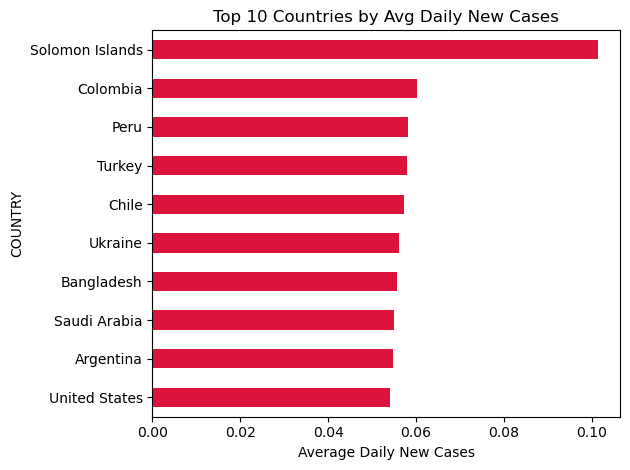

In [50]:
# Calculate daily new cases
df['new_cases'] = df.groupby('COUNTRY')['TC'].diff().fillna(0)

# Compute average daily increase per country
avg_increase = df.groupby('COUNTRY')['new_cases'].mean().sort_values(ascending=False).head(10)

print("Top 10 Countries with Highest Average Daily Increase in Cases:")
print(avg_increase)

# Plot
avg_increase.plot(kind='barh', color='crimson', title='Top 10 Countries by Avg Daily New Cases')
plt.xlabel('Average Daily New Cases')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


### Q7: Which countries had the most consistent government response (stringency index)?

Top 10 Countries with Most Consistent Stringency Index:
COUNTRY
Malta                              0.0
Equatorial Guinea                  0.0
Faeroe Islands                     0.0
French Polynesia                   0.0
Grenada                            0.0
Guernsey                           0.0
Guinea-Bissau                      0.0
Isle of Man                        0.0
Jersey                             0.0
Bonaire Sint Eustatius and Saba    0.0
Name: STI, dtype: float64


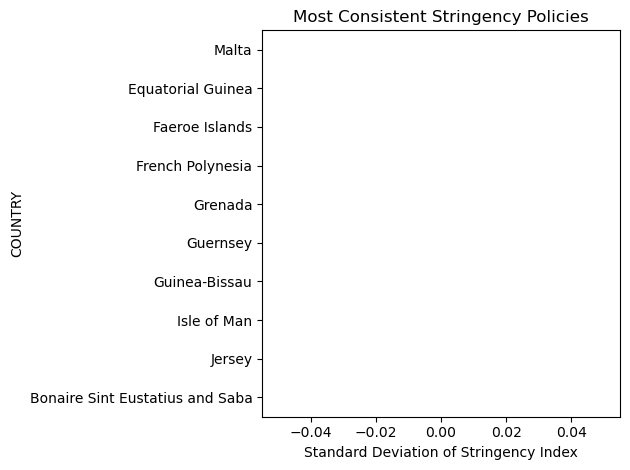

In [51]:
# Calculate standard deviation of stringency index
stringency_variability = df.groupby('COUNTRY')['STI'].std().sort_values().head(10)

print("Top 10 Countries with Most Consistent Stringency Index:")
print(stringency_variability)

# Plot
stringency_variability.plot(kind='barh', color='seagreen', title='Most Consistent Stringency Policies')
plt.xlabel('Standard Deviation of Stringency Index')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


### Q8: Which countries had the best outcomes relative to population size?

Top 10 Countries with Lowest Cases Per Million:
                     COUNTRY  CasesPerMillion  DeathsPerMillion
20903              Hong Kong         0.000000          0.000000
41800        Solomon Islands     81742.521190          0.000000
1457                Anguilla    114249.093227          0.000000
26041                   Laos    198448.614289          0.000000
45989                  Timor    238951.538448          0.000000
16118                   Fiji    252859.155232      50571.831076
18887              Greenland    253278.500961          0.000000
33274          New Caledonia    262366.330535          0.000000
38772  Saint Kitts and Nevis    270587.216359          0.000000
19098                Grenada    283369.582390          0.000000


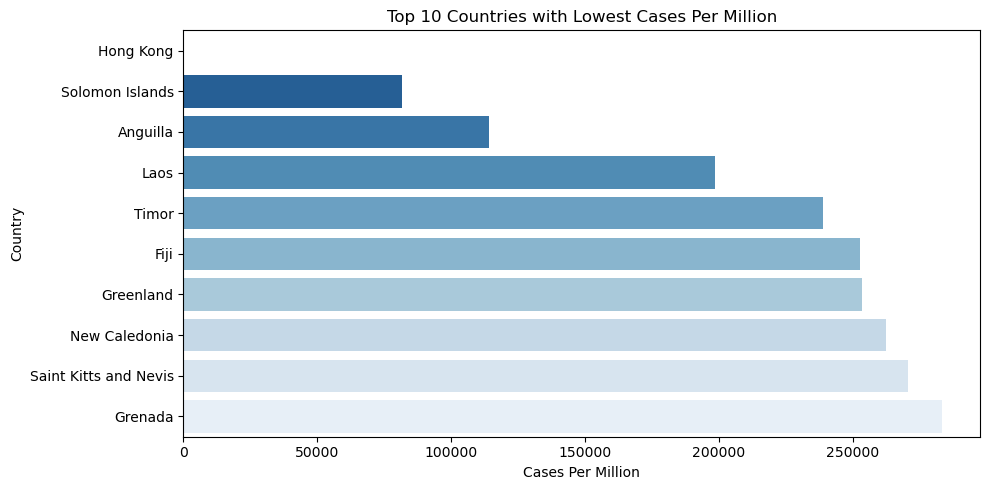

In [52]:
# Normalize total cases and deaths by population
latest = df.sort_values('DATE').drop_duplicates('COUNTRY', keep='last')
latest['CasesPerMillion'] = (latest['TC'] / latest['POP']) * 1_000_000
latest['DeathsPerMillion'] = (latest['TD'] / latest['POP']) * 1_000_000

best_outcomes = latest.sort_values('CasesPerMillion').head(10)

print("Top 10 Countries with Lowest Cases Per Million:")
print(best_outcomes[['COUNTRY', 'CasesPerMillion', 'DeathsPerMillion']])

# Plot
plt.figure(figsize=(10,5))
sns.barplot(data=best_outcomes, x='CasesPerMillion', y='COUNTRY', palette='Blues_r')
plt.title('Top 10 Countries with Lowest Cases Per Million')
plt.xlabel('Cases Per Million')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


## -By Karthik